In [2]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import sys
import seaborn as sns

In [3]:
PATH_TO_LOAD = "../Processed_data_new/01_MF4_Extracted"

df = pd.read_csv(os.path.join(PATH_TO_LOAD, "SEB880_extracted_mf4.csv"), parse_dates=['datetime'])

In [15]:
df.datetime

0         2022-09-06 19:05:03
1         2022-09-06 19:05:04
2         2022-09-06 19:05:05
3         2022-09-06 19:05:06
4         2022-09-06 19:05:06
                  ...        
3170969   2023-07-13 09:11:46
3170970   2023-07-13 09:11:47
3170971   2023-07-13 09:11:48
3170972   2023-07-13 09:11:49
3170973   2023-07-13 09:11:50
Name: datetime, Length: 3170974, dtype: datetime64[ns]

[3. 4. 5. 6. 7.]


/var/folders/66/86s66dd95nx0972mbj4kyl940000gn/T/ipykernel_58346/699140927.py:31: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(timestamps, speed, linestyle='solid', marker='',  label=f"Session {i}")


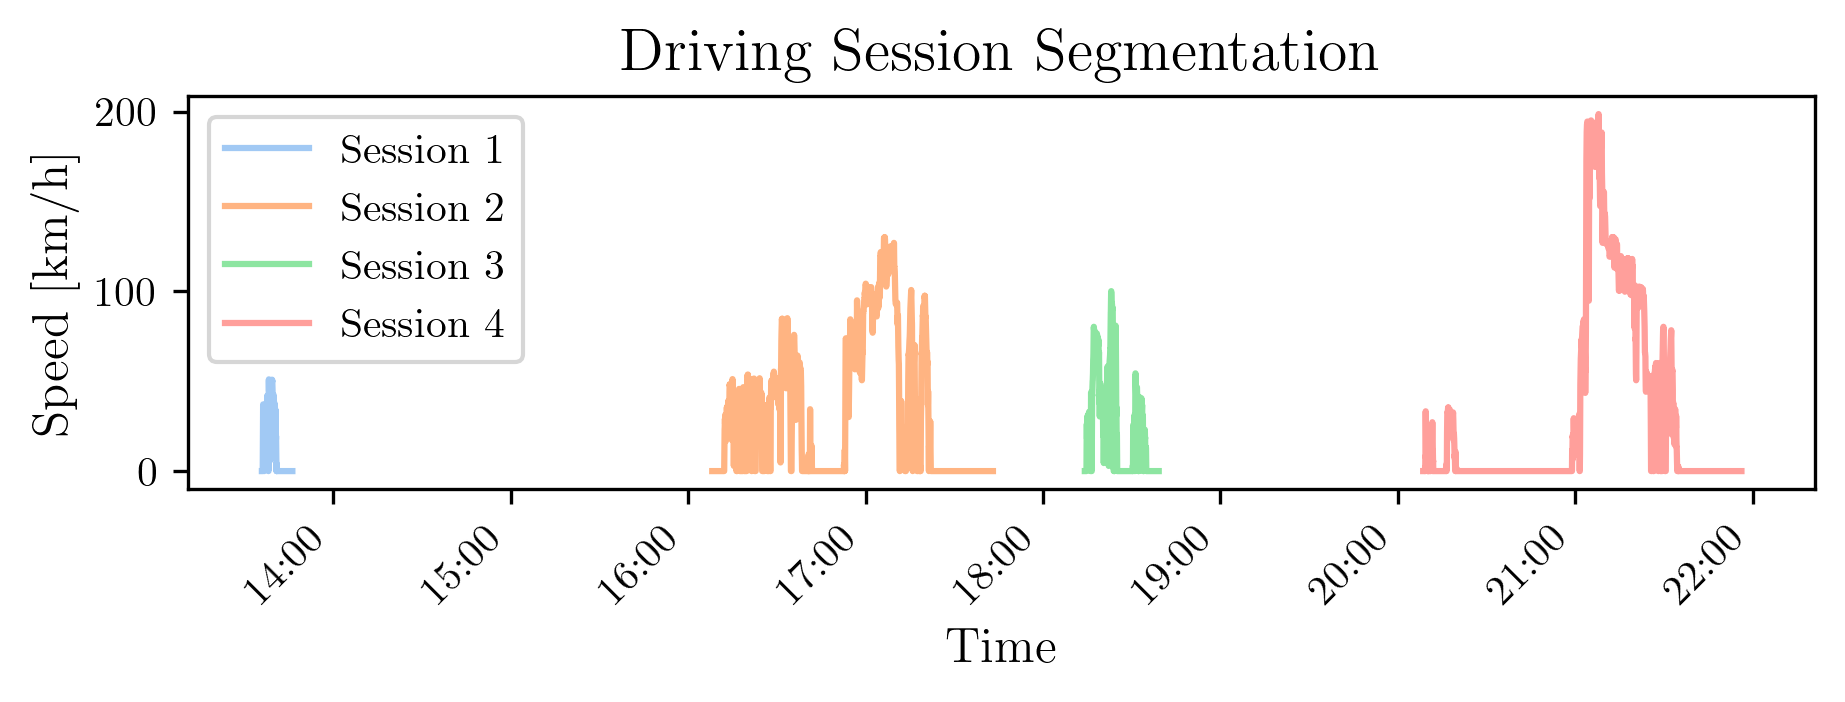

In [8]:
import matplotlib.dates as mdates

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 12,  # Adjust the font size for all elements
    "axes.labelsize": 12,  # Font size of axis labels
    "xtick.labelsize": 10,  # Font size of x-axis tick labels
    "ytick.labelsize": 10,  # Font size of y-axis tick labels
    "legend.fontsize": 10,  # Font size of legend
    "figure.titlesize": 14,  # Font size of figure title
})

# Unique date
date_unique = df.datetime.dt.date.unique()

day = date_unique[1]

plt.figure(figsize=(7, 1.7), dpi=300)
sns.set_palette("pastel")

day_sessions = df.session[df.datetime.dt.date == day].unique()
print(day_sessions)
for i, id in enumerate(day_sessions):
    if i < 1:
        continue
    session = df.session == id
    timestamps = df.datetime[session]
    speed = df.KBI_speed[session]
    plt.plot_date(timestamps, speed, linestyle='solid', marker='',  label=f"Session {i}")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format x-axis tick labels to show hours and minutes
plt.xticks(rotation=45, ha='right')

plt.legend()
plt.title("Driving Session Segmentation")
plt.xlabel("Time")
plt.ylabel("Speed [km/h]")
plt.savefig("/Users/wannerje/Dropbox/Porsche/eth_report/Img/driving_session_seg.pdf", format="pdf", bbox_inches="tight")
plt.show()